In [4]:
import torch
import matplotlib.pyplot as plt
import sys
from pathlib import Path

path = Path.cwd().parents[1]
if str(path) not in sys.path:
    sys.path.append(str(path))

from src.dgps import PSA_VOL, STATIN_PSA

['/nfs/ghome/live/danceh/.local/mambaforge/envs/causalgp/lib/python312.zip', '/nfs/ghome/live/danceh/.local/mambaforge/envs/causalgp/lib/python3.12', '/nfs/ghome/live/danceh/.local/mambaforge/envs/causalgp/lib/python3.12/lib-dynload', '', '/nfs/ghome/live/danceh/.local/mambaforge/envs/causalgp/lib/python3.12/site-packages', '/nfs/ghome/live/danceh/Causal-GP/causal-KL-GP']


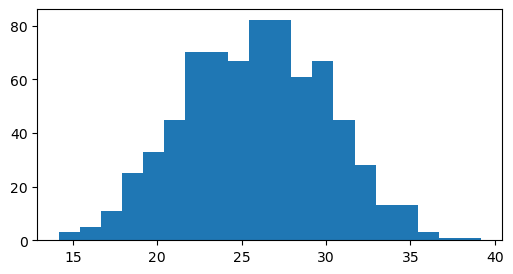

In [2]:
# Sampling Dataset 1
samples = 725
seed = 0

age, bmi, aspirin, statin, cancer, psa = STATIN_PSA(samples, gamma = False, seed =  seed)

# Plotting scatter
fig,axs = plt.subplots(figsize = (6,3))
plt.hist(psa, 20);
plt.show()

In [3]:
from torch.distributions import Gamma
logf = torch.log((6.8 + 0.04*age - 0.15*bmi - 0.60*statin + 0.55*aspirin + cancer))
logf.var()**0.5,Gamma(100,1).sample((100,)).log().var()**0.5

(tensor(0.1109), tensor(0.0997))

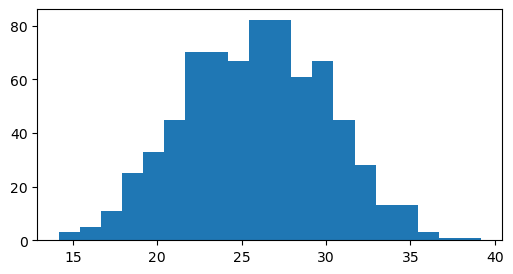

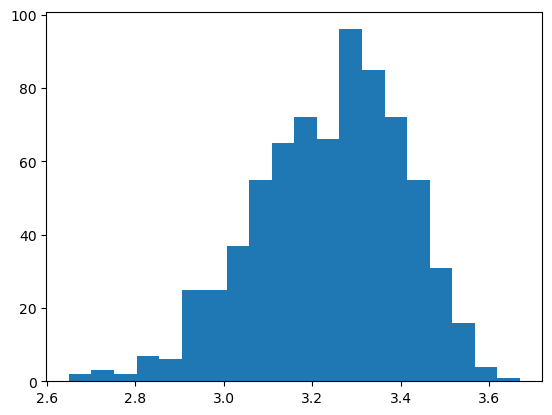

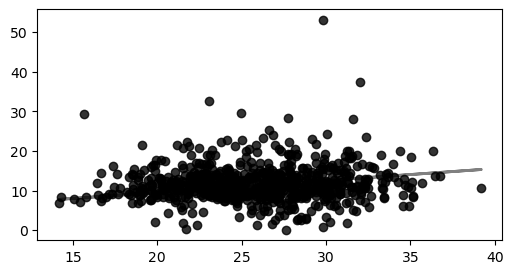

In [4]:
# Sampling Dataset 2
samples = 725
psa, fvol, vol = PSA_VOL(samples, seed = seed, psa = psa)

# Plotting hist and scatter
fig,axs = plt.subplots(figsize = (6,3))
plt.hist(psa, 20)
plt.show()
plt.hist(psa.log(),20)
plt.show()

fig,axs = plt.subplots(figsize = (6,3))
plt.plot(psa, fvol, color = "grey", lw = 2)
plt.scatter(psa, vol, color = "black", alpha = 0.8, zorder = 10)
#plt.xlim(0,60)
#plt.ylim(0,60)